In [1]:
# pyscience imports
import os
import sys
import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
# plt.style.use("dark_background")
sns.set(style="ticks", context="talk")
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
%pwd
years = list(range(1951, 1996, 1))
colorder = ['year', 'club', 'played', 'home_w', 'home_d', 'home_l', 'home_f', 'home_a', 
'away_w', 'away_d', 'away_l', 'away_f', 'away_a', 'pts' , 'n_teams']
epl_renames = {
    'Team': 'club',
    'Played': 'played',
    'Pts': 'pts'
}

'/home/alal/Dropbox/1_Research/league-tables-scraper'

In [3]:
english_league = []
scottish_league = []
for s in years:
    # english league
    try:
        r = pd.read_csv('english_league_tables/english_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r.rename(columns = epl_renames, inplace=True)
        r = r[colorder]
        english_league.append(r)
    except:
        print('English League ' + str(s) + ' league table not found')
    # scottish league
    try:
        r = pd.read_csv('scottish_league_tables/scottish_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r = r[colorder]
        scottish_league.append(r)
    except:
        print('Scottish League ' + str(s) + ' league table not found')

In [4]:
spl_series = pd.concat(scottish_league)
spl_series = spl_series[[c for c in spl_series.columns if not c.startswith('Unnamed')]]
spl_series['pos'] = spl_series.index + 1
spl_series.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos
0,1951,Hibernian,30.0,13,1,1.0,44.0,9.0,9.0,3.0,3.0,34.0,17.0,48.0,16,1
1,1951,Rangers,30.0,10,3,2.0,36.0,13.0,7.0,1.0,7.0,28.0,24.0,38.0,16,2
2,1951,Dundee,30.0,11,3,1.0,32.0,12.0,4.0,5.0,6.0,15.0,18.0,38.0,16,3
3,1951,Hearts,30.0,10,3,2.0,46.0,17.0,6.0,2.0,7.0,26.0,28.0,37.0,16,4
4,1951,Aberdeen,30.0,9,2,4.0,35.0,21.0,6.0,3.0,6.0,26.0,29.0,35.0,16,5


In [5]:
epl_series = pd.concat(english_league)
epl_series = epl_series[[c for c in epl_series.columns if not c.startswith('Unnamed')]]
epl_series['year'] = 1900 + epl_series.year
epl_series['pos'] = epl_series.index + 1

In [6]:
spl_series['goals'] = spl_series.home_f + spl_series.away_f
epl_series['goals'] = epl_series.home_f + epl_series.away_f
spl_series['goals_permatch'] = spl_series.goals / spl_series.played
epl_series['goals_permatch'] = epl_series.goals / epl_series.played
epl_series['club'] = epl_series['club'].str.title()
spl_series['club'] = spl_series['club'].str.title()
epl_series.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos,goals,goals_permatch
0,1951,Tottenham Hotspur,42,17,2,2,54,21,8,8,5,28,23,60,22,1,82,1.952381
1,1951,Manchester United,42,14,4,3,42,16,10,4,7,32,24,56,22,2,74,1.761905
2,1951,Blackpool,42,12,6,3,43,19,8,4,9,36,34,50,22,3,79,1.880952
3,1951,Newcastle United,42,10,6,5,36,22,8,7,6,26,31,49,22,4,62,1.476190
4,1951,Arsenal,42,11,5,5,47,28,8,4,9,26,28,47,22,5,73,1.738095


In [7]:
sort(epl_series['club'].unique())
sort(spl_series['club'].unique())

array(['Arsenal', 'Aston Villa', 'Barnsley', 'Birmingham City',
       'Blackburn Rovers', 'Blackpool', 'Bolton Wanderers', 'Brentford',
       'Brighton   Hove Albion', 'Bristol City', 'Bristol Rovers',
       'Burnley', 'Bury', 'Cardiff City', 'Carlisle United',
       'Charlton Athletic', 'Chelsea', 'Coventry City', 'Crystal Palace',
       'Derby County', 'Doncaster Rovers', 'Everton', 'Fulham',
       'Grimsby Town', 'Huddersfield Town', 'Hull City', 'Ipswich Town',
       'Leeds United', 'Leicester City', 'Leyton Orient', 'Lincoln City',
       'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Millwall', 'Newcastle United', 'Northampton',
       'Norwich City', 'Nottingham Forest', 'Notts County',
       'Oldham Athletic', 'Oxford United', 'Plymouth Argyle', 'Port Vale',
       'Portsmouth', 'Preston North End', "Queen'S Park Rangers",
       'Queens Park Rangers', 'Reading', 'Rotherham United',
       'Sheffield United', 'Sheffield Wedne

array(['Aberdeen', 'Airdrieonians', 'Arbroath', 'Ayr United', 'Celtic',
       'Clyde', 'Clydebank', 'Cowdenbeath', 'Dumbarton', 'Dundee',
       'Dundee United', 'Dunfermline Athletic', 'East Fife',
       'East Stirling', 'Falkirk', 'Hamilton Academical',
       'Heart Of Midlothian', 'Hearts', 'Hibernian', 'Kilmarnock',
       'Morton', 'Motherwell', 'Partick Thistle', 'Queen Of The South',
       "Queen'S Park", 'Raith Rovers', 'Rangers', 'St. Johnstone',
       'St. Mirren', 'Stirling Albion', 'Third Lanark'], dtype=object)

In [8]:
epl_series.to_csv('english_league_tables/_epl_panel.csv')
spl_series.to_csv('scottish_league_tables/_spl_panel.csv')

# Winners 

In [9]:
epl_winners = epl_series.query('pos == 1')
epl_winners[['club', 'pos']].groupby('club').sum().sort_values(by='pos', ascending = False)

,pos
club,
Liverpool,12
Manchester United,7
Arsenal,4
Everton,4
Leeds United,3
Tottenham Hotspur,2
Derby County,2
Ipswich Town,2
Nottingham Forest,1


In [10]:
spl_winners = spl_series.query('pos == 1')
spl_winners[['club', 'pos']].groupby('club').sum().sort_values(by='pos', ascending = False)

,pos
club,
Rangers,18
Celtic,16
Aberdeen,4
Hearts,2
Hibernian,2
Dundee,1
Dundee United,1
Kilmarnock,1


# Arsenal 

In [19]:
arsenal_ts = epl_series.query('club == "Arsenal"')
arsenal_ts.query('pos == 1')['year']

0    1953
0    1971
0    1989
0    1991
Name: year, dtype: int64

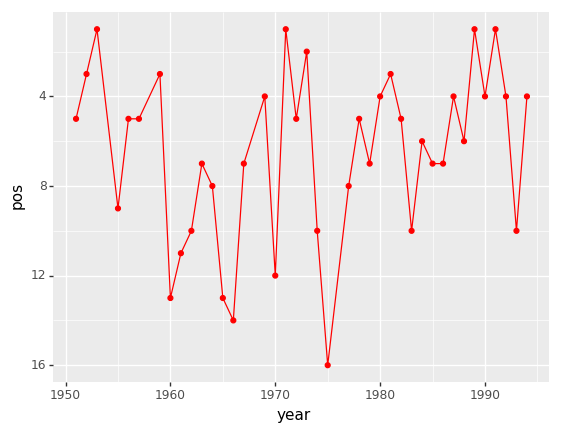

<ggplot: (8749606107961)>

In [12]:
ggplot(arsenal_ts, aes(x='year', y = 'pos')) + geom_point(colour = 'red') + geom_line(colour='red') +\
    scale_y_reverse()

In [13]:
old_firm_ts = spl_series.query('club == "Celtic" | club == "Rangers"')
old_firm_ts.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos,goals,goals_permatch
1,1951,Rangers,30.0,10,3,2.0,36.0,13.0,7.0,1.0,7.0,28.0,24.0,38.0,16,2,64.0,2.133333
6,1951,Celtic,30.0,6,3,6.0,29.0,25.0,6.0,2.0,7.0,19.0,21.0,29.0,16,7,48.0,1.600000
1,1952,Rangers,30.0,10,4,1.0,32.0,13.0,6.0,5.0,4.0,29.0,18.0,41.0,16,2,61.0,2.033333
8,1952,Celtic,30.0,7,5,3.0,30.0,22.0,3.0,3.0,9.0,22.0,33.0,28.0,16,9,52.0,1.733333
0,1953,Rangers,30.0,12,1,2.0,49.0,14.0,6.0,6.0,3.0,31.0,25.0,43.0,16,1,80.0,2.666667


/home/alal/anaconda3/lib/python3.7/site-packages/plotnine/scales/scales.py:28: UserWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

  warn(_TPL_DUPLICATE_SCALE.format(ae))


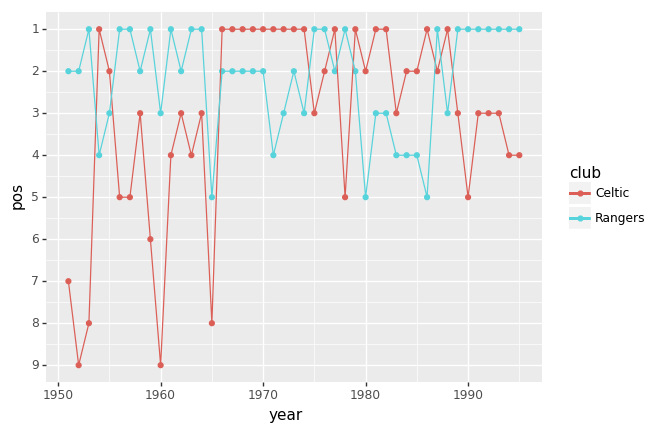

<ggplot: (-9223363287250783067)>

In [14]:
ggplot(old_firm_ts, aes(x='year', y = 'pos', colour = 'club')) + geom_point() + geom_line() +\
    ylim(0,10) + scale_y_reverse(breaks=np.arange(1,10,1))  

In [15]:
scotlandgoals = spl_series[['year','goals_permatch']].groupby('year').mean()
englandgoals = epl_series[['year','goals_permatch']].groupby('year').mean()

# Goal Tallies 

In [16]:
scotlandgoals = spl_series[['year','goals_permatch']].groupby('year').mean()
englandgoals = epl_series[['year','goals_permatch']].groupby('year').mean()

In [17]:
ts = pd.concat([scotlandgoals, englandgoals], axis=1)
ts.columns = ['scotland_goals_per_match', 'england_goals_per_match']
ts.reset_index(inplace=True)
ts.head()

,year,scotland_goals_per_match,england_goals_per_match
0,1951,1.731250,1.529221
1,1952,1.850000,1.612554
2,1953,1.985417,1.632035
3,1954,1.885417,1.661255
4,1955,1.795833,1.701299


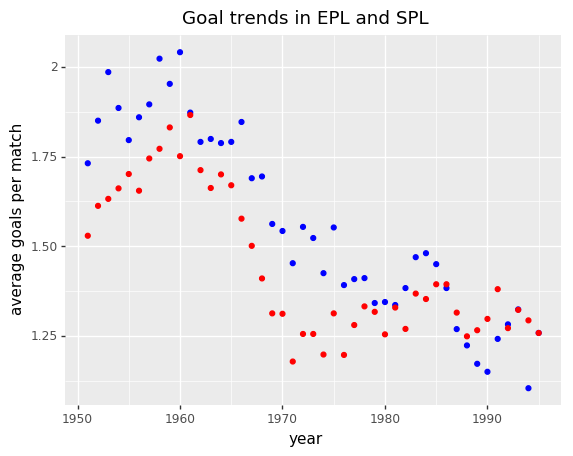

<ggplot: (-9223363287251023528)>

In [18]:
ggplot(ts, aes(x='year')) +\
    geom_point(aes(y='scotland_goals_per_match'), colour='Blue') +\
    geom_point(aes(y='england_goals_per_match'), colour='Red') +\
    labs(y = 'average goals per match', 
         title = 'Goal trends in EPL and SPL')